<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></span></li><li><span><a href="#Get-fixation-distributions" data-toc-modified-id="Get-fixation-distributions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get fixation distributions</a></span></li><li><span><a href="#Switching-Tools" data-toc-modified-id="Switching-Tools-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Switching Tools</a></span></li><li><span><a href="#Fitting" data-toc-modified-id="Fitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#RT-Testing" data-toc-modified-id="RT-Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>RT Testing</a></span></li></ul></div>

# IMPORTS

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import itertools
import os
import glob
import sys
import datetime

In [6]:
import pickle
from numba import vectorize, jit, njit, float64, prange

In [7]:
sys.path.append('../')
import importlib
import modules.utils_addm_007 as utils_addm

In [8]:
importlib.reload(utils_addm)

<module 'modules.utils_addm_007' from '../modules/utils_addm_007.py'>

## Test fitting

In [5]:
%%time
sub_sims = pickle.load( open( "../version/004/output/2018_11_01_1513/rt_dist_param_recovery.pickle", "rb" ) )

CPU times: user 9.48 s, sys: 3.15 s, total: 12.6 s
Wall time: 12.7 s


In [6]:
%%time

best_fits = pickle.load( open( "../version/004/output/2018_11_01_1513/rt_dist_param_recovery.picklep_recov_fits_best.pickle", "rb" ) )

CPU times: user 4.48 s, sys: 28.3 ms, total: 4.5 s
Wall time: 4.52 s


In [232]:
# Create our iterator
param_combos = np.arange(len(sub_sims))

In [233]:
# function to reformate dict key to string of parameter values
def extract_params(i):
    for key in sub_sims[i]:
        x = key.split('_')
        arr = np.array(x, dtype=np.float32)
        return(arr)

In [234]:
# extract parameter values that were simulated
actual_parameters = tuple(map(extract_params, param_combos))

In [235]:
# function for calculating difference
def calc_dif(x):
    diff = best_fits[x] - actual_parameters[x]
    return(diff)

In [236]:
# calculate the difference between estimate and actual for all paramter combos
dev = np.asarray(tuple(map(calc_dif, param_combos)))

In [243]:
# convert tuple to array
best_fits_array = np.asarray(best_fits)
actual_array = np.asarray(actual_parameters)

In [348]:
# root mean squared error
def param_fit_rmse(x):
   
    val = np.sqrt(np.sum(np.power(dev[:,x], 2))/len(param_combos))
    print(f'{best_fits[0].index[x]} range: {min(best_fits_array[:,x]):.3f} to {max(best_fits_array[:,x]):.3f}.')
    print(f'number of paramter values: {len(np.unique(actual_array[:,x])):.0f}')
    print(f'{best_fits[0].index[x]} RMSE: {val:.4f}\n')
    
    # plot
    x_axis = "actual " + str(best_fits[0].index[x])
    y_axis = "estimated " + str(best_fits[0].index[x])
    sns.jointplot(actual_array[:,x], best_fits_array[:,x], kind="kde").set_axis_labels(x_axis, y_axis)
    plt.show()
    #sns.kdeplot(val, shade=True);
    
    return(val)

In [349]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_context("talk")

%matplotlib inline  

drift range: 0.005 to 0.148.
number of paramter values: 16
drift RMSE: 0.0144



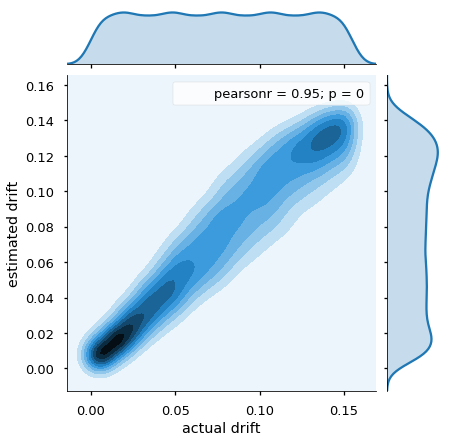

boundary range: 0.050 to 0.350.
number of paramter values: 16
boundary RMSE: 0.0098



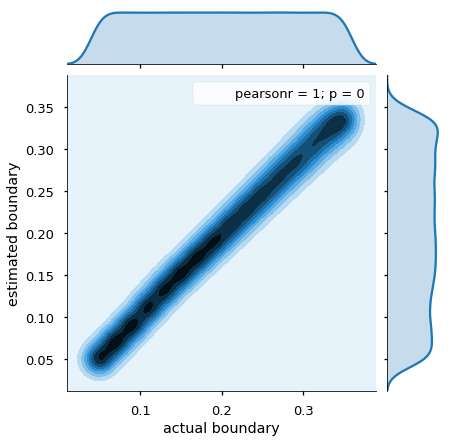

theta range: 0.119 to 0.959.
number of paramter values: 12
theta RMSE: 0.2465



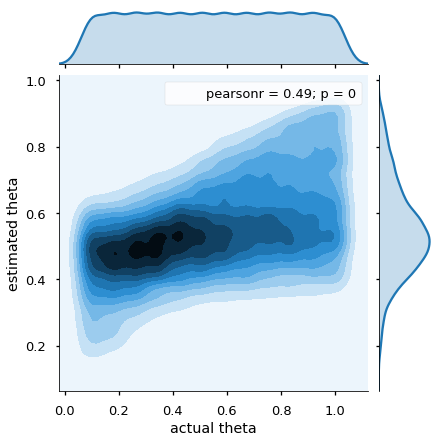

sp_bias range: -0.300 to 0.300.
number of paramter values: 7
sp_bias RMSE: 0.0298



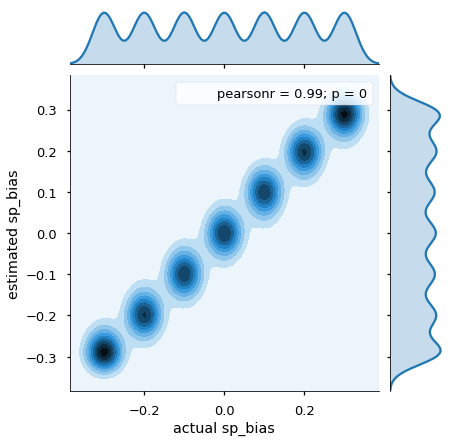

CPU times: user 1min 53s, sys: 193 ms, total: 1min 53s
Wall time: 1min 53s


[0.01436234464121784,
 0.0097888504480787893,
 0.24654870138864957,
 0.029788484578573124]

In [350]:
%%time
[param_fit_rmse(x) for x in np.arange(4)]

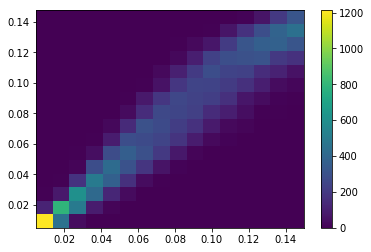

In [306]:
plt.hist2d(actual_array[:,x], best_fits_array[:,x], bins=16);
plt.colorbar();

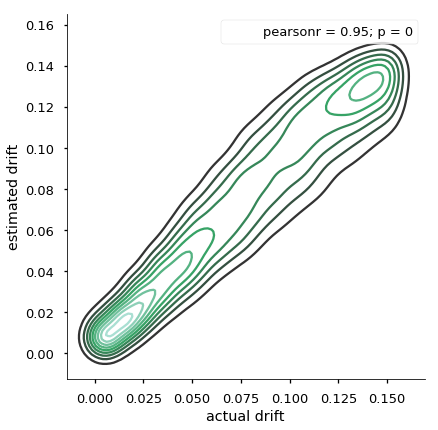

In [332]:
g = sns.JointGrid(actual_array[:,x], best_fits_array[:,x], ratio=100).set_axis_labels(x_axis, y_axis)
g.plot_joint(sns.kdeplot)
g.annotate(stats.pearsonr)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()

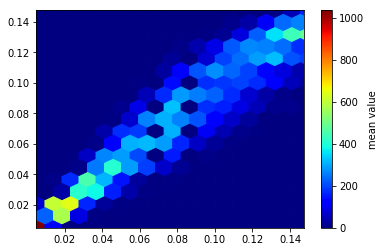

In [296]:
plt.hexbin(actual_array[:,x], best_fits_array[:,x], gridsize=16, cmap=cm.jet, bins=None)
plt.axis([np.min(best_fits_array[:,x]), np.max(best_fits_array[:,x]), \
          np.min(best_fits_array[:,x]), np.max(best_fits_array[:,x])])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show()  

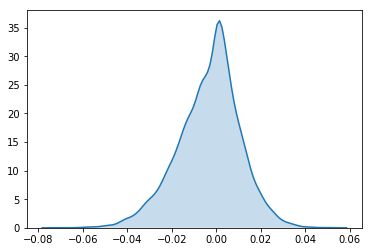

In [279]:
sns.kdeplot(rmse, shade=True);

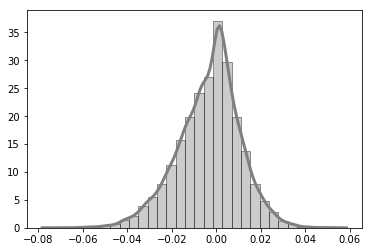

In [271]:
sns.distplot(dev[:,0], norm_hist=True, kde=True, 
             bins=30, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.show()

# END

In [2]:
# Add path where custom modules are saved
sys.path.append('/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/functions')
import utils_addm                         # for importing custom module

In [132]:
dev[1][0]

0.0076633885706292697

In [3]:
expdata_file_name = "data/made_v2/expdata.csv"
fixations_file_name = "data/made_v2/fixations.csv"

In [5]:
import glob
face_list = glob.glob('/Users/djw/Dropbox/PHD/CENDRI/Project/Code/LabSharedFolder/MADE01/CODE/v3_FractionalWeights/images/morphs/face/*.jpg')
house_list = glob.glob('/Users/djw/Dropbox/PHD/CENDRI/Project/Code/LabSharedFolder/MADE01/CODE/v3_FractionalWeights/images/morphs/house/*.jpg')

# create values to match to stimuli
values = np.arange(-1.,1.01,0.02)

# Get rid of extra digits
for i in range(len(values)):
    values[i] = round(values[i], 2)

# Create Data Frames
house_df = pd.DataFrame(
    {'value': values,
     'exemplar': house_list
    })

face_df = pd.DataFrame(
    {'value': values,
     'exemplar': face_list
    })

In [16]:
face_df.exemplar[0]

'/Users/djw/Dropbox/PHD/CENDRI/Project/Code/LabSharedFolder/MADE01/CODE/v3_FractionalWeights/images/morphs/face/faceMorph000.jpg'

In [7]:
# create values to match to stimuli
values = np.arange(-1.,1.01,0.02)

# Get rid of extra digits
for i in range(len(values)):
    values[i] = round(values[i], 2)

# Create Data Frames
house_df = pd.DataFrame(
    {'value': values,
     'exemplar': house_list
    })

face_df = pd.DataFrame(
    {'value': values,
     'exemplar': face_list
    })


# Get fixation distributions

# Switching Tools

# Fitting

In [4]:
path = "/Users/djw/Dropbox/PROGRAMMING/_NEURO/2017_MADE/aDDM_DJW/outputs/2017-11-16/" # path to saved sim shelve file

def join_all_sims(path):
    """
    """
    
    all_files = glob.glob(os.path.join(path, "*.csv"))                        # advisable to use os.path.join as this makes concatenation OS independent

    dfs = {}  # create dict to hold dataframes
    x = 0

    for f in all_files:
        dfs[x] = pd.read_csv(f)
        dfs[x] = dfs[x].drop(dfs[x].columns[[0]], axis=1)  # get rid of unnamed column
        x+=1
    return dfs

In [5]:
dfs = join_all_sims(path)

In [8]:
# Get left and right values from data
df = pd.DataFrame.from_csv(expdata_file_name, header=0, sep=",", index_col=None)

item_left_val = np.unique(df.item_left_val)
item_right_val = np.unique(df.item_right_val)

values = list(itertools.product(item_left_val, item_right_val))
values_list = np.around(values,decimals=2)   # currently produces 81 combos

nonDec = 0.8

# Function to calculate rt Distribution for simulated parameter combos
rt_dist = rtDistFunc(nonDec, values_list, dfs)

# Save RT Dist (pickle or shelve)

# Figure out how to shelve correctly (maybe just can't interrupt?)
# See if can extract params
# Fit 1/2 trials
# Test Fit

In [11]:
x = rt_dist['0.0514285714286_0.278571428571_0.325']['1.63_0.42'][:,0]
y_accept = rt_dist['0.0514285714286_0.278571428571_0.325']['1.63_0.42'][:,1]
y_reject = rt_dist['0.01_0.05_0.1']['1.63_0.42'][:,2]

In [18]:
sys.getsizeof(dfs)

9320

In [17]:
sys.getsizeof(rt_dist)

9320

In [ ]:
plt.plot(x,y_accept)


In [7]:
def rtDistFunc(nonDec, values_list, dfs):
    
    # Create upper level dict to hold param combos
    rt_dist = {}
    
    # Create bins for RT distribution
    # ?? Add in NDT or not??
    bins = np.arange(nonDec,10.1,.1)             # start, stop, step (used for hist)
    binz = np.delete(bins,-1)                    # delete the last value so bin number = count number
    
    # Make list of all value combos (or supply as argument)
    values_list_keys = []
    for i in range(len(values_list)):
        values_list_keys.append(str(values_list[i,0]) + '_' + str(values_list[i,1]))
    
    for d in dfs:

        # Name for outer dict based on the valWeight and upperBound with an integer (as STRING) leading
        param_combos = str(dfs[d].scaling[0]) + '_' + str(dfs[d].upper_boundary[0]) + '_' + str(dfs[d].theta[0])
        # Create nested dict to hold values
        rt_dist[param_combos] = {}
                
        # create subsets of RT for each value combo
        for i in range(len(values_list)):
            data = dfs[d][(dfs[d].val_face == values_list[i,0]) & (dfs[d].val_house == values_list[i,1])]
            data0 = data[data.resp == -1]             # select reject responses
            data1 = data[data.resp == 1]              # select accept responses

            # Create RT distrib (counts/bin)
            count0, bins = np.histogram(data0.rt, bins)  # unpack the reject counts in each bin
            count1, bins = np.histogram(data1.rt, bins)  # unpack the accept counts in each bin

            length = float(sum(count0) + sum(count1)) # number of non NaN values

            # initialize array to hold Distribs
            distrib = np.ndarray((len(count0), 3))
            distrib[:,0] = binz                       # bin values from START of bin
            distrib[:,1] = count0 /length              # reject
            distrib[:,2] = count1 /length              # accept

                        # select the rows with given drift  # remove all columns except rt and resp
            value_key = values_list_keys[i]
            rt_dist[param_combos][value_key] = distrib
    
    return rt_dist
            

In [106]:
dfsActualParticipant = pd.read_csv('/Users/djw/Dropbox/PROGRAMMING/PythonLearning/DDM/examples/cleaned_oneImage_Mult.csv')

dfsActualParticipant.drop(dfsActualParticipant.columns[[3]], axis=1, inplace=True)
dfsActualParticipant.rename(columns={"summedVal": 'value',
                                     'acceptReject': 'resp'}, inplace=True)

dfsActualParticipant.loc[dfsActualParticipant['resp'] == 0, 'resp'] = -1.


In [107]:
dfsActualParticipant.drop(dfsActualParticipant.columns[4:], axis=1, inplace=True)

In [108]:
dfsActualParticipant.head()

,subj_idx,value,rt,resp
0,1,3.04,8.883308,1.0
1,1,-0.14,4.550172,1.0
2,1,0.28,3.716686,1.0
3,1,-0.52,4.516826,-1.0
4,1,0.04,2.966837,1.0


In [110]:
participants = pd.read_csv(expdata_file_name)

In [111]:
participants.head()
# Divide RT by 1000
# rename item left val and right val to face and house


,parcode,trial,rt,choice,item_left,item_right,item_left_val,item_right_val
0,1,1,8883.308377,1,1.32,1.72,1.63,1.69
1,1,2,4550.171639,1,0.38,-0.52,0.41,-0.39
2,1,3,3716.686491,1,0.96,-0.68,0.89,-0.66
3,1,4,4516.825782,-1,-0.94,0.42,-0.89,0.42
4,1,5,2966.836687,1,-0.24,0.28,-0.37,0.42


In [ ]:
# Value to replace zero values...
epsilon = np.finfo(float).eps

# TURN INTO FUNCTION
for key in np.sort(rtDist.keys()):                                   # go through all keys of rtDist (which are the paramCombos)
    rtDistList = []    # create list to store data

    valWeight = float(key.split('_')[0])                             # splitting and choosing first element (weight)
    for x in range(len(dfsActualParticipant)):
        driftVal = round((dfsActualParticipant.value[x] * valWeight), 8)    # calculating driftVal based on value and weight
        
        row = int((dfsActualParticipant.rt[x]-nonDec)/.1)                # increment by 1 for every increase in .1 seconds (taking into account ndt)
        if (dfsActualParticipant.resp[x] == -1):                     # if reject
            rtDistList.append(rtDist[key][driftVal][row,1])
            #dfsSimParticipant[s][key][x] = rtDist[key][driftVal][row,1]

        else:                                                        # if accept
            rtDistList.append(rtDist[key][driftVal][row,2])
            #dfsSimParticipant[s][key][x] = rtDist[key][driftVal][row,2]

    dfsActualParticipant[key] = rtDistList                           # Create column from list
    dfsActualParticipant = dfsActualParticipant.replace(to_replace=0, value=epsilon)     # Remove values of 0 and replace with Epsilon

#dfsSimParticipant[s] = np.log(dfsSimParticipant[s].iloc[:,4:]) * -1  # Convert to natural log and Remove unnecessary columns
dfsActualParticipant = np.log(dfsActualParticipant.iloc[:,4:]) * -1  # Convert to natural log and Remove unnecessary columns

In [ ]:
subject = {}

for x in range(len(dfsSimParticipant)):
    subject[x] = pd.DataFrame(dfsSimParticipant[x].sum(axis=0))
    
    weight = []
    boundary = []
    
    for m in range(len(subject[x].index)):
        weight.append(float(subject[x].index[m].split('_')[0]))      # create list of weight values
        boundary.append(float(subject[x].index[m].split('_')[1]))    # create list of boundary values

    subject[x]['weight'] = weight                                       # create column with weight values
    subject[x]['boundary'] = boundary                                   # create column with boundary values

subject[0].head()

# RT Testing

In [ ]:
from Gnuplot import Gnuplot as gplot
from Gnuplot import Data as gdata
from Gnuplot import Func as gfunc
g = gplot(persist = 1)